# How do major tech companies' stock performances compare over the five year period from January 2016 to December 2020?

## Introduction

Our project focuses on understanding how major tech companies' stock
performances compare over the five year period from January 2016 to
December 2020.

We aim to answer several questions: 
1. How the trends of these companies' stock trends differ over time? 
2. Are there identifiable and consistent patterns of volatility among these stocks? 
3. Which companies show the highest returns and highest volatility? 

Additionally, we will investigate whether some companies have similar movements together in the market. Our analysis will focus on gathering direct, interpretable results that will address these questions. Our dataset includes standard financial fields such as Date, Open, High, Low, Close, Adjusted Close, and Volume. The main source of data is Yahoo
Finance. This will provide consistent and complete price information.


## **How are the daily returns of ten major technology companies correlated?**

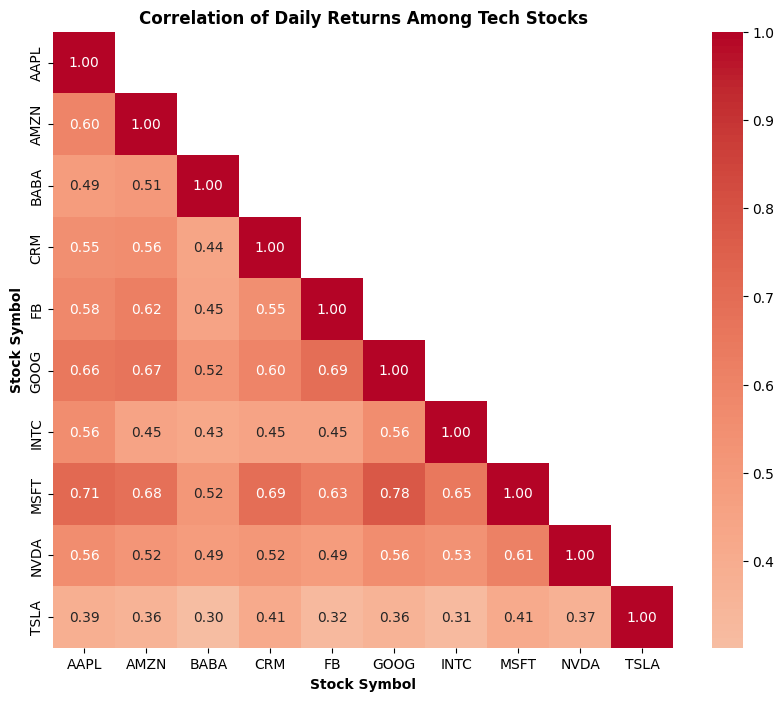

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

aapl = pd.read_csv("data/AAPL.csv")
amzn = pd.read_csv("data/AMZN.csv")
baba = pd.read_csv("data/BABA.csv")
crm  = pd.read_csv("data/CRM.csv")
fb   = pd.read_csv("data/FB.csv")
goog = pd.read_csv("data/GOOG.csv")
intc = pd.read_csv("data/INTC.csv")
msft = pd.read_csv("data/MSFT.csv")
nvda = pd.read_csv("data/NVDA.csv")
tsla = pd.read_csv("data/TSLA.csv")

stocks = [
    ("AAPL", aapl),
    ("AMZN", amzn),
    ("BABA", baba),
    ("CRM", crm),
    ("FB", fb),
    ("GOOG", goog),
    ("INTC", intc),
    ("MSFT", msft),
    ("NVDA", nvda),
    ("TSLA", tsla),
]

merge = None

for symbol, data in stocks:
    data = data[["Date", "Close"]].rename(columns={"Close": symbol})
    if(merge is None):
        merge = data
    else:
        merge = pd.merge(merge, data, on="Date", how="outer")

merge = merge.sort_values("Date").set_index("Date")

start_date = "2016-01-01"
end_date = "2020-12-31"
merge = merge.loc[start_date:end_date]
returns = merge.pct_change().dropna()

corr = returns.corr()
# print(corr)


plt.figure(figsize=(10, 8))
sns.heatmap(
    corr, 
    annot=True, 
    cmap="coolwarm", 
    center=0, 
    fmt=".2f", 
    mask=np.triu(corr, k=1)
)

plt.title("Correlation of Daily Returns Among Tech Stocks",
          fontweight="bold")
plt.xlabel("Stock Symbol",
          fontweight="bold")
plt.ylabel("Stock Symbol",
          fontweight="bold")
plt.show()


The purpose of this analysis is to examine the degree of correlation among the daily returns of ten major technology companies. By visualizing correlations using a heatmap, the goal is to identify how closely the price movements of these companies are related, providing insights into market movements.

A heatmap is used to visually represent the correlation between the daily returns of different tech stocks, making it easier to identify relationships and patterns. The "coolwarm" pallete is used to distinguish postive and negative correlations. Red tones represent positive relationships, and Blue tones represent negative relationships. Lighter shades represent a weaker relationship. The diagonal line of 1.0 correlation shows a frame of reference because each stock is perfectly correlated with itself. This creates a baseline to help interpret the rest of the heatmap.

The heatmap shows postive correlations between daily returns for all ten technology firms. This pattern suggests that companies within the technology sector tend to experience similar day-to-day movements in their stock prices. This is expected as many of these firms are subject to the same economic issues, industry trends, and investor support.

Consistent positive correlations imply that investing in multiple different stocks in the technology industry may have higher risk because prices tend to move together. Conversely, investors could somewhat mitigate the risk by investing in companies with a lower correlation.

There are many limitations to this analysis. The first is that the analysis is limited to technology stocks. This could be an issue because the same trends may not be generalized to other industries. The second is that external events are not accounted for. If a major event shakes the price of a specific stock, it is not accounted for in the analysis which could distort results.

In order to supplement this analysis, we should compare the correlations between technology stocks and other industries in order to have a broader understanding of the market. If tech stocks are found to be equally correlated with stocks from other industries, this would suggest that market-wide factors, rather than sector-specific factors, drive stock movements. In this case, invensting in multiple stocks across multiple sectors would have similarly high risks.

## **How have the cummulative returns of tech stocks changed over time?**

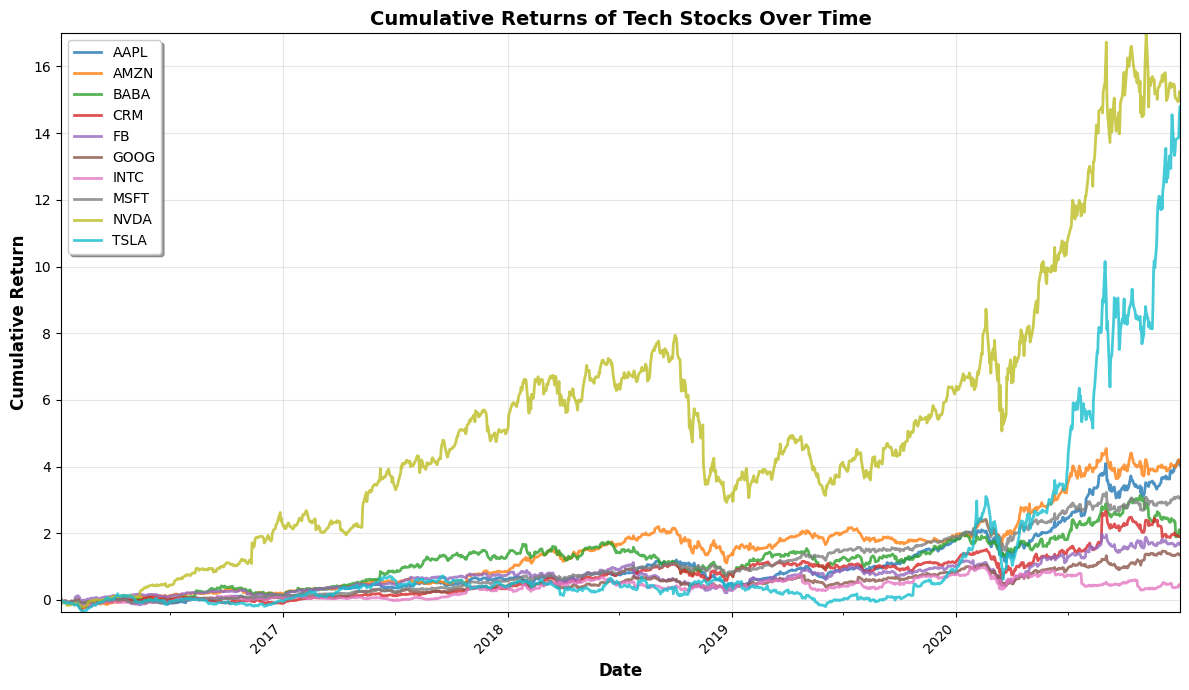

In [2]:
# Visualization: Cummulative Returns of Tech Stocks Time Series Line Plot

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare data
stocks = [
    ("AAPL", pd.read_csv("data/AAPL.csv")),
    ("AMZN", pd.read_csv("data/AMZN.csv")),
    ("BABA", pd.read_csv("data/BABA.csv")),
    ("CRM", pd.read_csv("data/CRM.csv")),
    ("FB", pd.read_csv("data/FB.csv")),
    ("GOOG", pd.read_csv("data/GOOG.csv")),
    ("INTC", pd.read_csv("data/INTC.csv")),
    ("MSFT", pd.read_csv("data/MSFT.csv")),
    ("NVDA", pd.read_csv("data/NVDA.csv")),
    ("TSLA", pd.read_csv("data/TSLA.csv")),
]

merge = None
for symbol, data in stocks:
    data = data[["Date", "Close"]].rename(columns={"Close": symbol})
    if merge is None:
        merge = data
    else:
        merge = pd.merge(merge, data, on="Date", how="outer")

merge = merge.sort_values("Date").set_index("Date")
start_date = "2016-01-01"
end_date = "2020-12-31"
merge = merge.loc[start_date:end_date]
returns = merge.pct_change().dropna()

# Calculate cumulative returns
cumulative_returns = (1 + returns).cumprod() - 1

# Convert index to datetime for better date formatting
cumulative_returns.index = pd.to_datetime(cumulative_returns.index)

# Plot
fig, ax = plt.subplots(figsize=(12, 7), facecolor='white')
ax.set_facecolor('white')

for column in cumulative_returns.columns:
    ax.plot(cumulative_returns.index, cumulative_returns[column], 
            label=column, linewidth=2, alpha=0.8)

ax.set_xlabel('Date', fontsize=12,
          fontweight="bold")
ax.set_ylabel('Cumulative Return', fontsize=12,
          fontweight="bold")
ax.set_title('Cumulative Returns of Tech Stocks Over Time', fontsize=14, fontweight='bold')
ax.legend(loc='upper left', frameon=True, shadow=True)
ax.grid(True, alpha=0.3)

# Remove all margins/padding so axes meet at origin
ax.margins(0)

# Format x-axis to show dates clearly
import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator((1, 7)))
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


The purpose of this visualization is to depict the cummulative returns of tech stocks over time. One can see from this visualization that a couple tech stocks such as NVDA and TSLA have had significantly more growth than the other tech stocks. This can be improved by adding a baseline benchmark such as the S&P 500 return. This will show how tech stocks are performing compared to the overall market. Another addition which would be helpful is a technology sector benchmark so one can see how the 10 stocks in the visualization are performing compared to the overall technology sector. The color legend was chosen to use distinct colors to be able to clearly distinguish between the different stocks. The axis used were time period (one decade) on the x-axis which was chosen to show to long term affect of a stock and cummulative returns on the y-axis. Finally, a line plot was used because the data is continuous and the visualization is intended to depict the cummulative returns over time. 

## How consistently do patterns appear across different windows?

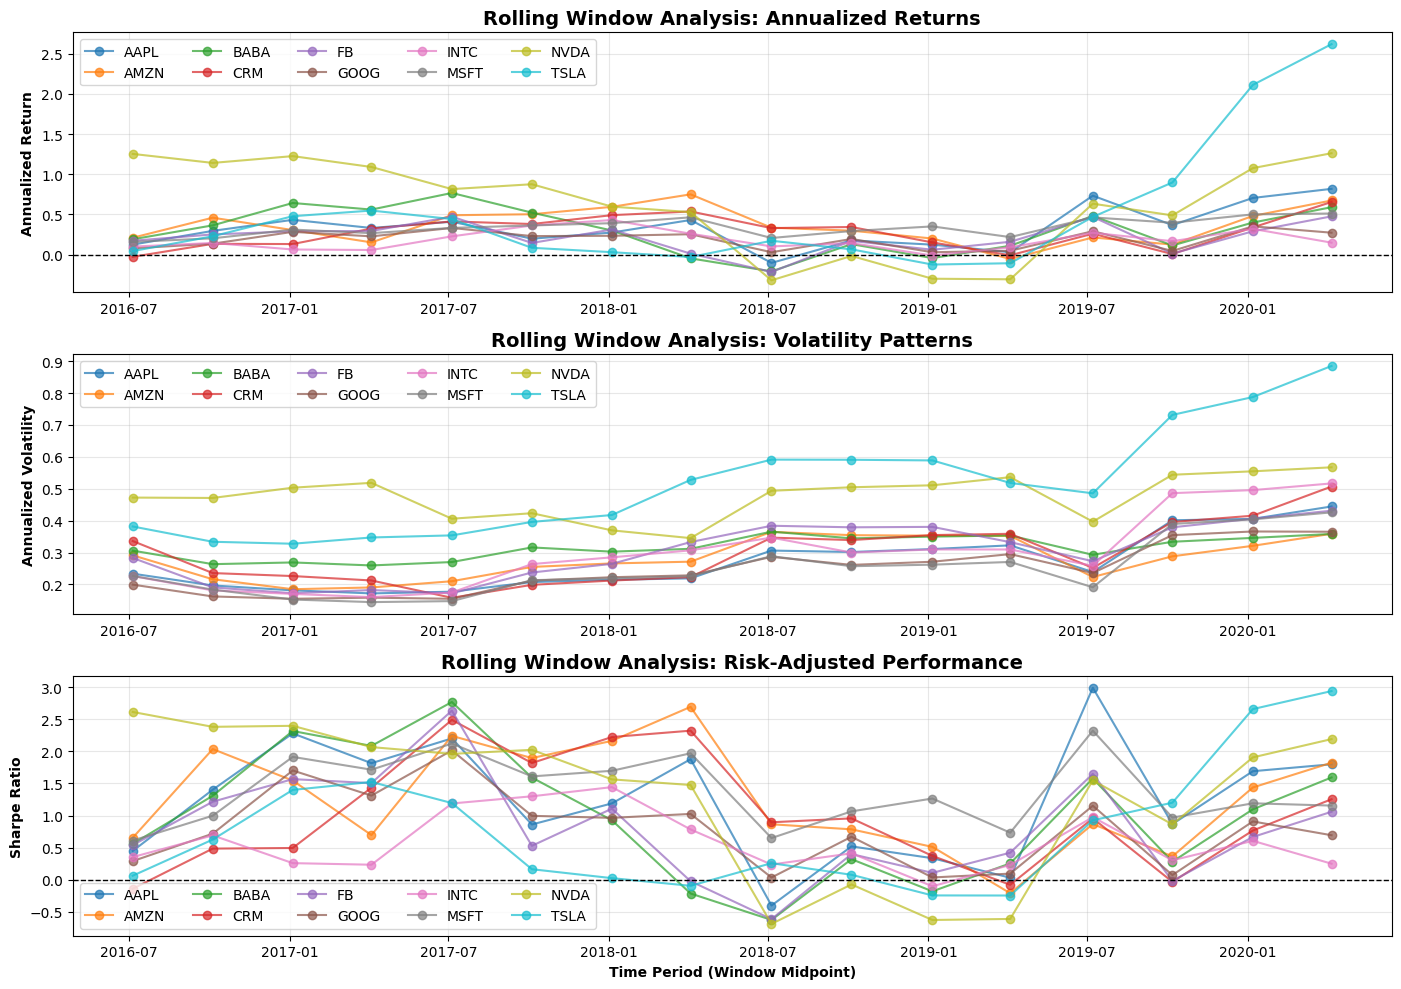

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare data
stocks = [
    ("AAPL", pd.read_csv("data/AAPL.csv")),
    ("AMZN", pd.read_csv("data/AMZN.csv")),
    ("BABA", pd.read_csv("data/BABA.csv")),
    ("CRM", pd.read_csv("data/CRM.csv")),
    ("FB", pd.read_csv("data/FB.csv")),
    ("GOOG", pd.read_csv("data/GOOG.csv")),
    ("INTC", pd.read_csv("data/INTC.csv")),
    ("MSFT", pd.read_csv("data/MSFT.csv")),
    ("NVDA", pd.read_csv("data/NVDA.csv")),
    ("TSLA", pd.read_csv("data/TSLA.csv")),
]

merge = None
for symbol, data in stocks:
    data = data[["Date", "Close"]].rename(columns={"Close": symbol})
    if merge is None:
        merge = data
    else:
        merge = pd.merge(merge, data, on="Date", how="outer")

merge = merge.sort_values("Date").set_index("Date")
start_date = "2016-01-01"
end_date = "2020-12-31"
merge = merge.loc[start_date:end_date]
returns = merge.pct_change().dropna()

window = 252      # ~1 trading year
step = 63         # ~1 quarter step
symbols = returns.columns

rolling_stats = []

dates = returns.index
start_indices = range(0, len(dates) - window + 1, step)

for start in start_indices:
    end = start + window
    win_returns = returns.iloc[start:end]

    mean_daily = win_returns.mean()
    vol_daily = win_returns.std()

    # --- FIX IS HERE ---
    # Changed from geometric ((1+r)^252 - 1) to arithmetic (r * 252)
    # This aligns the return units with the volatility units
    ann_return = mean_daily * 252  
    
    ann_vol = vol_daily * np.sqrt(252)
    sharpe = (ann_return - 0.02) / ann_vol

    rolling_stats.append(
        pd.DataFrame({
            "start": dates[start],
            "end": dates[end-1],
            "symbol": symbols,
            "ann_return": ann_return.values,
            "ann_vol": ann_vol.values,
            "sharpe": sharpe.values
        })
    )

rolling_stats = pd.concat(rolling_stats, ignore_index=True)

# Convert start and end to datetime objects
rolling_stats['start'] = pd.to_datetime(rolling_stats['start'])
rolling_stats['end'] = pd.to_datetime(rolling_stats['end'])

# Compute window midpoint for x-axis
rolling_stats['window_mid'] = rolling_stats['start'] + (rolling_stats['end'] - rolling_stats['start']) / 2

# Create figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Plot 1: Rolling Annualized Returns
for symbol in rolling_stats['symbol'].unique():
    data = rolling_stats[rolling_stats['symbol'] == symbol]
    axes[0].plot(data['window_mid'], data['ann_return'], marker='o', label=symbol, alpha=0.7)
axes[0].set_ylabel('Annualized Return', fontweight='bold')
axes[0].set_title('Rolling Window Analysis: Annualized Returns', fontweight='bold', fontsize=14)
axes[0].legend(ncol=5, loc='best')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(0, color='black', linewidth=1, linestyle='--')

# Plot 2: Rolling Volatility
for symbol in rolling_stats['symbol'].unique():
    data = rolling_stats[rolling_stats['symbol'] == symbol]
    axes[1].plot(data['window_mid'], data['ann_vol'], marker='o', label=symbol, alpha=0.7)
axes[1].set_ylabel('Annualized Volatility', fontweight='bold')
axes[1].set_title('Rolling Window Analysis: Volatility Patterns', fontweight='bold', fontsize=14)
axes[1].legend(ncol=5, loc='best')
axes[1].grid(True, alpha=0.3)

# Plot 3: Rolling Sharpe Ratio
for symbol in rolling_stats['symbol'].unique():
    data = rolling_stats[rolling_stats['symbol'] == symbol]
    axes[2].plot(data['window_mid'], data['sharpe'], marker='o', label=symbol, alpha=0.7)
axes[2].set_xlabel('Time Period (Window Midpoint)', fontweight='bold')
axes[2].set_ylabel('Sharpe Ratio', fontweight='bold')
axes[2].set_title('Rolling Window Analysis: Risk-Adjusted Performance', fontweight='bold', fontsize=14)
axes[2].legend(ncol=5, loc='best')
axes[2].grid(True, alpha=0.3)
axes[2].axhline(0, color='black', linewidth=1, linestyle='--')

plt.tight_layout()
plt.show()


Time-series cross validation is employed to identify patterns which occur across different time windows. The window chosen is 252 because that is the number of trading days per year and the step is 63 because that is how many days are in a quarter.

The first visualization "Rolling Window Analysis: Annualized Returns" shows the compounded annual growth of each stock in addition to overlapping the data in 1 year periods to depicts the losses of a company better compared to a static average. This shows NVDA had a significant drop in stock price between 2018-07 and 2019-04. The second visualizaiton shows the volatity of stocks over time and the use of cross-validation displays spikes in the data more accurately by isolating the volatile year. The third visualization sheds light on which stocks to invest in by showing which stocks had a one off year compared to consistent performance.

## **What is the risk vs return tradeoff for each tech stock?**

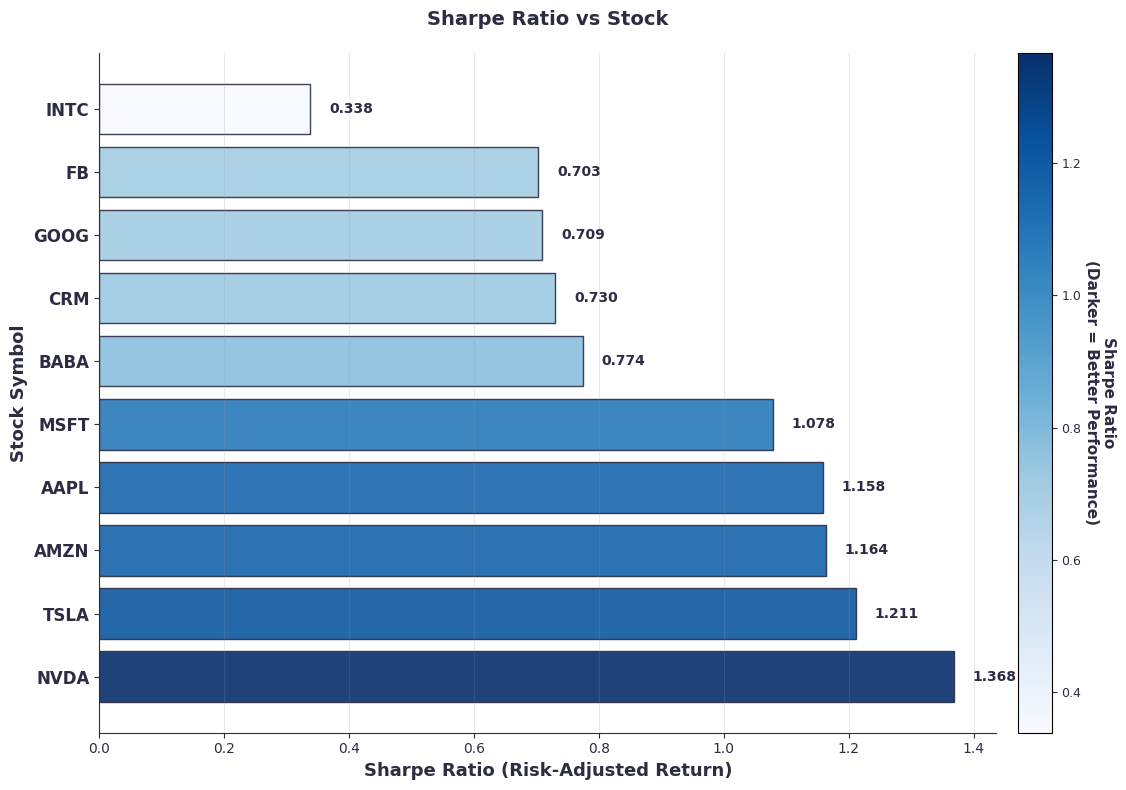

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Load and prepare data
stocks = [
    ("AAPL", pd.read_csv("data/AAPL.csv")),
    ("AMZN", pd.read_csv("data/AMZN.csv")),
    ("BABA", pd.read_csv("data/BABA.csv")),
    ("CRM", pd.read_csv("data/CRM.csv")),
    ("FB", pd.read_csv("data/FB.csv")),
    ("GOOG", pd.read_csv("data/GOOG.csv")),
    ("INTC", pd.read_csv("data/INTC.csv")),
    ("MSFT", pd.read_csv("data/MSFT.csv")),
    ("NVDA", pd.read_csv("data/NVDA.csv")),
    ("TSLA", pd.read_csv("data/TSLA.csv")),
]

merge = None
for symbol, data in stocks:
    data = data[["Date", "Close"]].rename(columns={"Close": symbol})
    if merge is None:
        merge = data
    else:
        merge = pd.merge(merge, data, on="Date", how="outer")

merge = merge.sort_values("Date").set_index("Date")
start_date = "2016-01-01"
end_date = "2020-12-31"
merge = merge.loc[start_date:end_date]
returns = merge.pct_change().dropna()

# Calculate Sharpe Ratio
risk_free_rate = 0.02
annual_returns = returns.mean() * 252
annual_volatility = returns.std() * np.sqrt(252)
sharpe_ratios = (annual_returns - risk_free_rate) / annual_volatility

# Sort by Sharpe Ratio
sharpe_df = pd.DataFrame({'Sharpe Ratio': sharpe_ratios}).sort_values('Sharpe Ratio', ascending=False)

# Create visualization
fig, ax = plt.subplots(figsize=(12, 8), facecolor='white')
ax.set_facecolor('white')

# Create normalization for colormap based on actual Sharpe values
norm = Normalize(vmin=sharpe_df['Sharpe Ratio'].min(), vmax=sharpe_df['Sharpe Ratio'].max())
cmap = plt.cm.Blues

# Assign colors based on Sharpe Ratio values
colors = [cmap(norm(value)) for value in sharpe_df['Sharpe Ratio']]
bars = ax.barh(range(len(sharpe_df)), sharpe_df['Sharpe Ratio'],
               color=colors, edgecolor='#2B2D42', linewidth=1, alpha=0.9)

# Add value labels
for i, (idx, row) in enumerate(sharpe_df.iterrows()):
    x_pos = row['Sharpe Ratio'] + 0.03 if row['Sharpe Ratio'] > 0 else row['Sharpe Ratio'] - 0.03
    ha = 'left' if row['Sharpe Ratio'] > 0 else 'right'
    ax.text(x_pos, i, f"{row['Sharpe Ratio']:.3f}", 
            va='center', ha=ha, fontsize=10, fontweight='bold', color='#2B2D42')

# Set y-axis labels
ax.set_yticks(range(len(sharpe_df)))
ax.set_yticklabels(sharpe_df.index, fontsize=12, color='#2B2D42', fontweight='bold')

# Labels and title
ax.set_xlabel('Sharpe Ratio (Risk-Adjusted Return)', fontsize=13, fontweight='bold', color='#2B2D42')
ax.set_ylabel('Stock Symbol', fontsize=13, fontweight='bold', color='#2B2D42')
ax.set_title('Sharpe Ratio vs Stock', 
             fontsize=14, fontweight='bold', color='#2B2D42', pad=20)

ax.grid(axis='x', alpha=0.2, color='#8D99AE')

# Add colorbar legend
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label('Sharpe Ratio\n(Darker = Better Performance)', 
               fontsize=11, fontweight='bold', color='#2B2D42', rotation=270, labelpad=25)
cbar.ax.tick_params(colors='#2B2D42', labelsize=9)

# Style spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#2B2D42')
ax.spines['bottom'].set_color('#2B2D42')
ax.tick_params(colors='#2B2D42')

plt.tight_layout()
plt.show()

The purpose of this visualization is to give someone insight into which tech stocks are the best for an investment, in terms of risk-adjusted performance. The higher the Sharpe Ratio the better the investment, for example NVDA would be a much better option than BABA. A limitation of this visualization is that there is no benchmark, so an improvement which can be made is the S&P 500 and tech sector performance as a baseline. The blue color gradient was used for users to easly be able to distinguish which stock is a better investment as well as using a consistent color palette improves the professionalism of the visualization. A horizontal bar chart was used because the data is categorical meaning every stock's evaluation is independent of one another.   

## **Does higher volatility lead to higher returns?**

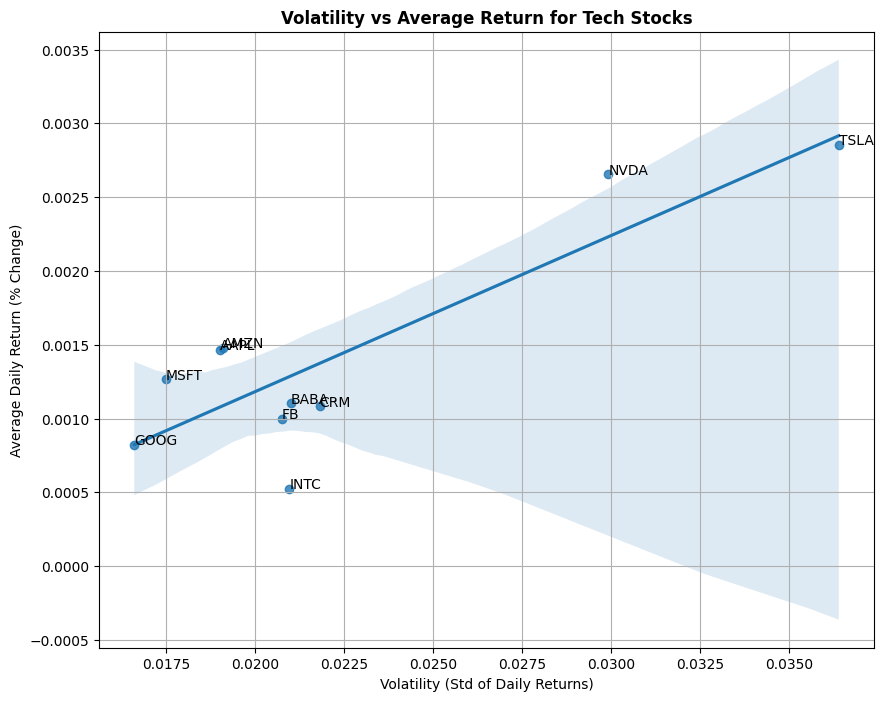

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

aapl = pd.read_csv("data/AAPL.csv")
amzn = pd.read_csv("data/AMZN.csv")
baba = pd.read_csv("data/BABA.csv")
crm  = pd.read_csv("data/CRM.csv")
fb   = pd.read_csv("data/FB.csv")
goog = pd.read_csv("data/GOOG.csv")
intc = pd.read_csv("data/INTC.csv")
msft = pd.read_csv("data/MSFT.csv")
nvda = pd.read_csv("data/NVDA.csv")
tsla = pd.read_csv("data/TSLA.csv")

stocks = [
    ("AAPL", aapl),
    ("AMZN", amzn),
    ("BABA", baba),
    ("CRM", crm),
    ("FB", fb),
    ("GOOG", goog),
    ("INTC", intc),
    ("MSFT", msft),
    ("NVDA", nvda),
    ("TSLA", tsla),
]

merge = None

for symbol, data in stocks:
    data = data[["Date", "Close"]].rename(columns={"Close": symbol})
    if(merge is None):
        merge = data
    else:
        merge = pd.merge(merge, data, on="Date", how="outer")

merge = merge.sort_values("Date").set_index("Date")
start_date = "2016-01-01"
end_date = "2020-12-31"
merge = merge.loc[start_date:end_date]
returns = merge.pct_change().dropna()

# Calculate Volatility and Returns
volatility = returns.std()
avg_return = returns.mean()

risk_return = pd.DataFrame({
    "Volatility": volatility,
    "Average Return": avg_return
})

plt.figure(figsize=(10,8))
sns.regplot(x="Volatility", y="Average Return", data=risk_return)
for i, txt in enumerate(risk_return.index):
    plt.annotate(txt, (risk_return["Volatility"][i], risk_return["Average Return"][i]))
plt.xlabel("Volatility (Std of Daily Returns)")
plt.ylabel("Average Daily Return (% Change)")
plt.title("Volatility vs Average Return for Tech Stocks", fontweight="bold")
plt.grid(True)
plt.show()

The purpose of this analysis is to determine whether higher volatility is associated with higher daily returns. A scatter plot with a regression line and confidence interval is used. The regression line highlights the overall trend and the confidence interval is used to show where data is more variable.

The scatter plot with a regression line suggests a positive relationship, indicating that stocks with higher volatility tend to have higher returns. However, there are two major outliers that are skewing the data and widening the confidence interval. To obtain a clearer picture of the relationship, the analysis will be rerun after removing these outliers.

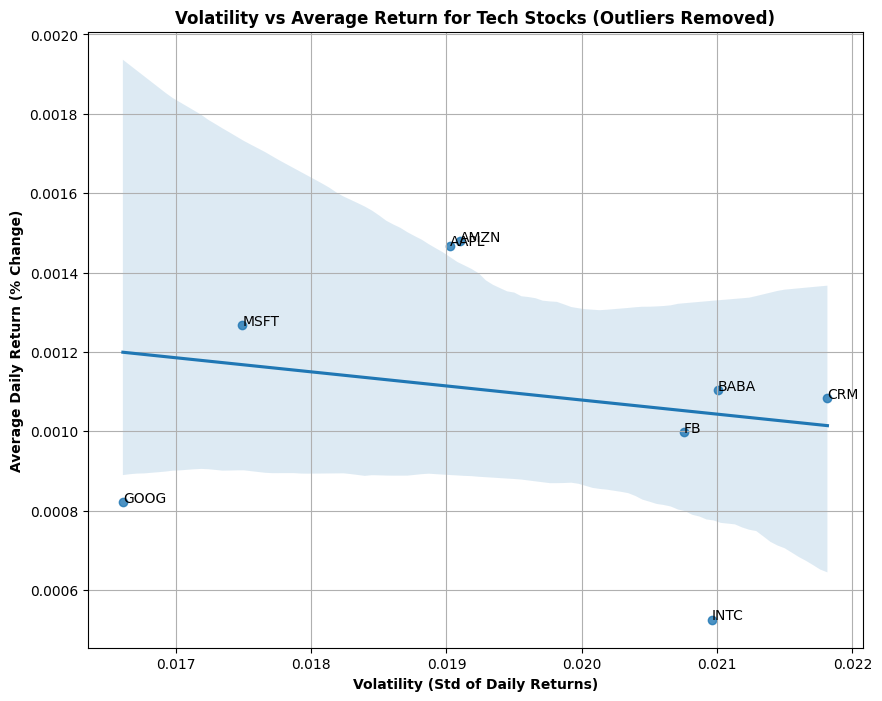

In [6]:
stocks_without_outliers = [
    ("AAPL", aapl),
    ("AMZN", amzn),
    ("BABA", baba),
    ("CRM", crm),
    ("FB", fb),
    ("GOOG", goog),
    ("INTC", intc),
    ("MSFT", msft),
    # ("NVDA", nvda),
    # ("TSLA", tsla),
]

merge = None

for symbol, data in stocks_without_outliers:
    data = data[["Date", "Close"]].rename(columns={"Close": symbol})
    if(merge is None):
        merge = data
    else:
        merge = pd.merge(merge, data, on="Date", how="outer")

merge = merge.sort_values("Date").set_index("Date")
start_date = "2016-01-01"
end_date = "2020-12-31"
merge = merge.loc[start_date:end_date]
returns = merge.pct_change().dropna()

# Calculate Volatility and Returns
volatility = returns.std()
avg_return = returns.mean()

risk_return = pd.DataFrame({
    "Volatility": volatility,
    "Average Return": avg_return
})

plt.figure(figsize=(10,8))
sns.regplot(x="Volatility", y="Average Return", data=risk_return)
for i, txt in enumerate(risk_return.index):
    plt.annotate(txt, (risk_return["Volatility"][i], risk_return["Average Return"][i]))
plt.xlabel("Volatility (Std of Daily Returns)",
          fontweight="bold")
plt.ylabel("Average Daily Return (% Change)",
          fontweight="bold")
plt.title("Volatility vs Average Return for Tech Stocks (Outliers Removed)",
          fontweight="bold")
plt.grid(True)
plt.show()

This plot shows the opposite trend from the previous analysis. After removing the outliers, the data indicate that higher volatility is associated with lower daily returns. This suggests that the apparent positive relationship in the earlier plot was largely driven by the extreme values, and that, for the majority of stocks, increased volatility may actually correspond to reduced returns.

Our findings indicate that there are no takeaways from the analysis. Our analysis is limited to a small subset of technology stocks. It is not representative of the broader market. In order to have a good understanding of daily returns and volatility, we need to analyze a much larger selection of stocks over a wide variety of different industries. We can not use these findings to improve our understanding of stock prices.

## **Are specific stocks more prone to extreme swings?**

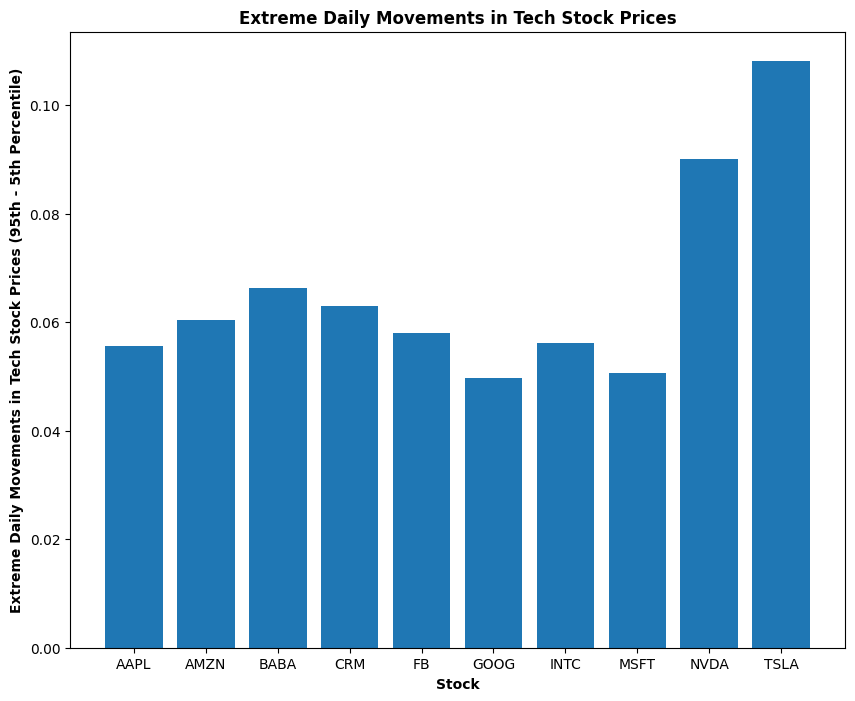

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

aapl = pd.read_csv("data/AAPL.csv")
amzn = pd.read_csv("data/AMZN.csv")
baba = pd.read_csv("data/BABA.csv")
crm  = pd.read_csv("data/CRM.csv")
fb   = pd.read_csv("data/FB.csv")
goog = pd.read_csv("data/GOOG.csv")
intc = pd.read_csv("data/INTC.csv")
msft = pd.read_csv("data/MSFT.csv")
nvda = pd.read_csv("data/NVDA.csv")
tsla = pd.read_csv("data/TSLA.csv")

stocks = [
    ("AAPL", aapl),
    ("AMZN", amzn),
    ("BABA", baba),
    ("CRM", crm),
    ("FB", fb),
    ("GOOG", goog),
    ("INTC", intc),
    ("MSFT", msft),
    ("NVDA", nvda),
    ("TSLA", tsla),
]

merge = None

for symbol, data in stocks:
    data = data[["Date", "Close"]].rename(columns={"Close": symbol})
    if(merge is None):
        merge = data
    else:
        merge = pd.merge(merge, data, on="Date", how="outer")

merge = merge.sort_values("Date").set_index("Date")
start_date = "2016-01-01"
end_date = "2020-12-31"
merge = merge.loc[start_date:end_date]
returns = merge.pct_change().dropna()

lower_tail = returns.quantile(0.05)
upper_tail = returns.quantile(0.95)

tail_spread = upper_tail - lower_tail

plt.figure(figsize=(10,8))
plt.bar(tail_spread.index, tail_spread.values)
plt.title("Extreme Daily Movements in Tech Stock Prices",
          fontweight="bold")
plt.ylabel("Extreme Daily Movements in Tech Stock Prices (95th - 5th Percentile)",
          fontweight="bold")
plt.xlabel("Stock",
          fontweight="bold")
plt.show()

The purpose of this analysis is to examine which technology stocks are most prone to extreme daily swings. We calculated the difference between the 95th percentile and 5th percentile of daily returns. Each bar represents a stock, with its height showing the range between unusually high and unusually low daily returns. This compares the extreme gains with the extreme losses across all stocks. This bar chart shows the range from approcimately 0.05 to 0.10. This indicates that all stock experience moderate extreme swings. Even NVDA and TSLA have only slightly larger spreads. This suggest that the extreme daily movements are similar among technology stocks.

This analysis is limited because the dataset only includes ten technology stocks. This is not enough data to represent the rest of the technology industry or other sectors. Additionally, using the percent change only captures the magnitude of the extremes. It does not tell us anything about frequency.

## How stable are the volatility, average returns, and correlations?

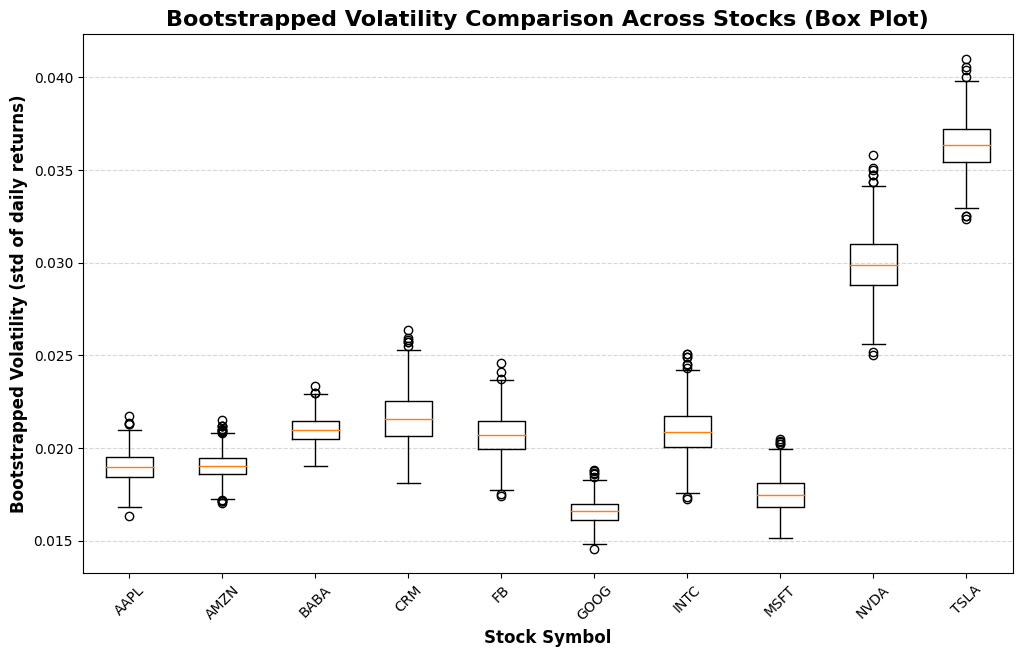

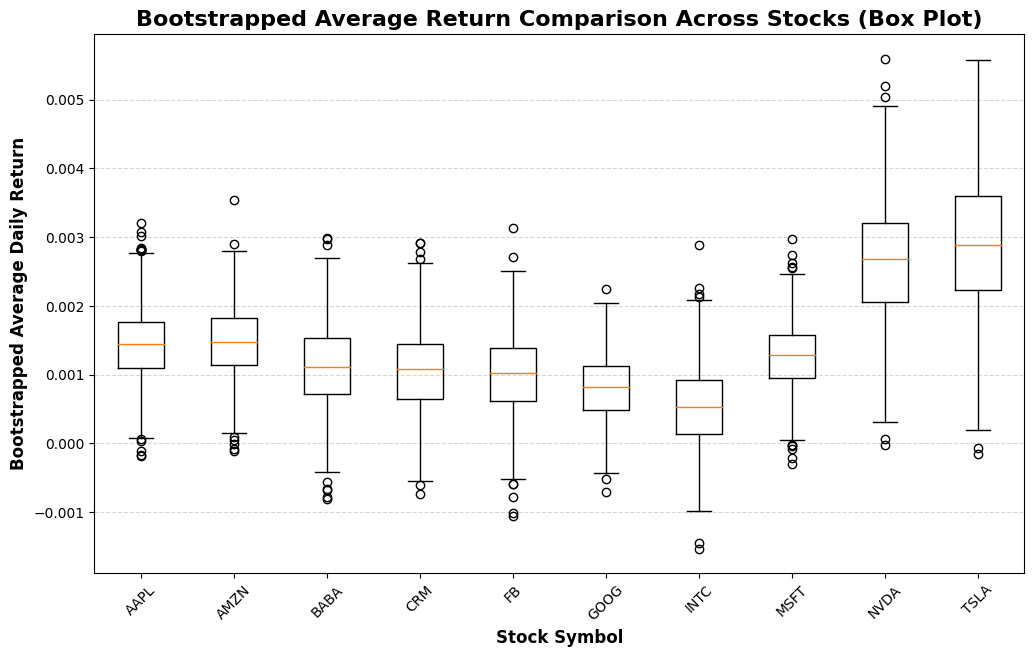

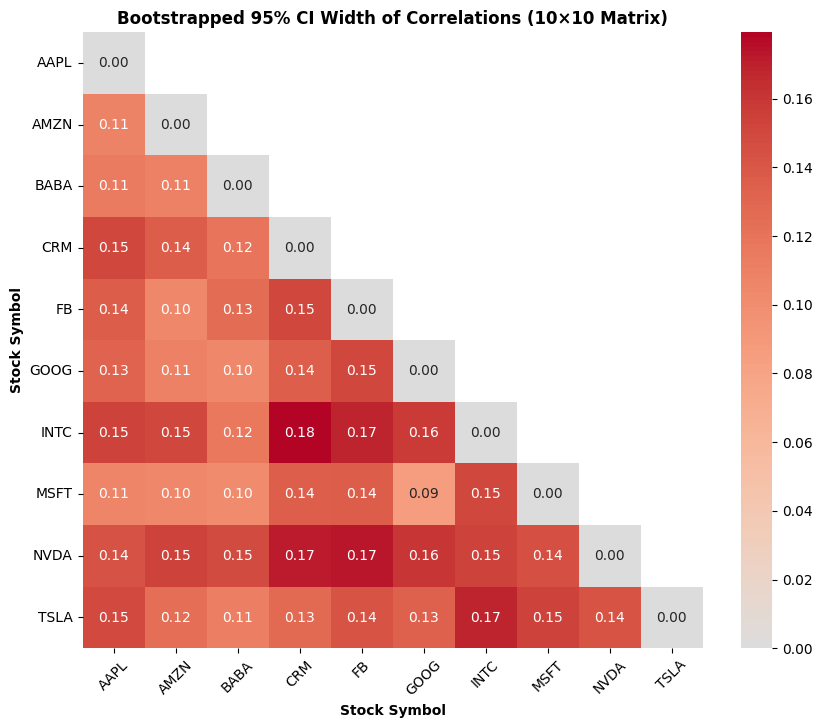

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load data
aapl = pd.read_csv("data/AAPL.csv")
amzn = pd.read_csv("data/AMZN.csv")
baba = pd.read_csv("data/BABA.csv")
crm  = pd.read_csv("data/CRM.csv")
fb   = pd.read_csv("data/FB.csv")
goog = pd.read_csv("data/GOOG.csv")
intc = pd.read_csv("data/INTC.csv")
msft = pd.read_csv("data/MSFT.csv")
nvda = pd.read_csv("data/NVDA.csv")
tsla = pd.read_csv("data/TSLA.csv")

stocks = [
    ("AAPL", aapl),
    ("AMZN", amzn),
    ("BABA", baba),
    ("CRM", crm),
    ("FB", fb),
    ("GOOG", goog),
    ("INTC", intc),
    ("MSFT", msft),
    ("NVDA", nvda),
    ("TSLA", tsla),
]

# Merge close prices
merge = None
for symbol, data in stocks:
    data = data[["Date", "Close"]].rename(columns={"Close": symbol})
    merge = data if merge is None else pd.merge(merge, data, on="Date", how="outer")

merge = merge.sort_values("Date").set_index("Date")
start_date = "2016-01-01"
end_date = "2020-12-31"
merge = merge.loc[start_date:end_date]
returns = merge.pct_change().dropna()

# Bootstrapping for all stocks
num_bootstrap = 1000
boot_results = {}

for symbol, _ in stocks:
    values = returns[symbol].dropna()
    boot = []

    for _ in range(num_bootstrap):
        sample = np.random.choice(values, size=len(values), replace=True)
        boot.append(np.std(sample))

    boot_results[symbol] = boot
# Create Box Plot
plt.figure(figsize=(12, 7))
plt.boxplot(boot_results.values(), labels=boot_results.keys(), vert=True)
plt.xticks(rotation=45)
plt.ylabel("Bootstrapped Volatility (std of daily returns)",
          fontweight="bold", fontsize=12)
plt.xlabel("Stock Symbol",
          fontweight="bold", fontsize=12)
plt.title("Bootstrapped Volatility Comparison Across Stocks (Box Plot)",
          fontweight="bold", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Bootstrapping average returns
boot_avg_returns = {}

for symbol, _ in stocks:
    values = returns[symbol].dropna()
    boot = []

    for _ in range(num_bootstrap):
        sample = np.random.choice(values, size=len(values), replace=True)
        boot.append(np.mean(sample))

    boot_avg_returns[symbol] = boot

# Plot boxplot for average returns
plt.figure(figsize=(12, 7))
plt.boxplot(boot_avg_returns.values(), labels=boot_avg_returns.keys(), vert=True)
plt.xticks(rotation=45)
plt.ylabel("Bootstrapped Average Daily Return",
          fontweight="bold", fontsize=12)
plt.xlabel("Stock Symbol",
          fontweight="bold", fontsize=12)
plt.title("Bootstrapped Average Return Comparison Across Stocks (Box Plot)",
          fontweight="bold", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

num_bootstrap = 1000
symbols = [s[0] for s in stocks]

boot_corr_matrix = {s1: {s2: [] for s2 in symbols} for s1 in symbols}

# Convert returns to numpy for speed
returns_np = returns[symbols].dropna()

# Bootstrapping
for _ in range(num_bootstrap):
    # sample rows with replacement
    idx = np.random.choice(len(returns_np), size=len(returns_np), replace=True)
    sample = returns_np.iloc[idx]

    # correlation matrix for this bootstrap sample
    corr = sample.corr()

    for s1 in symbols:
        for s2 in symbols:
            boot_corr_matrix[s1][s2].append(corr.loc[s1, s2])

# Create CI Matrices

corr_ci_lower = pd.DataFrame(
    {s1: {s2: np.percentile(boot_corr_matrix[s1][s2], 2.5)
          for s2 in symbols}
     for s1 in symbols},
    index=symbols
)

corr_ci_upper = pd.DataFrame(
    {s1: {s2: np.percentile(boot_corr_matrix[s1][s2], 97.5)
          for s2 in symbols}
     for s1 in symbols},
    index=symbols
)

# CI width matrix (uncertainty)
corr_ci_width = corr_ci_upper - corr_ci_lower

# Heatmap of CI Width


plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_ci_width,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    mask=np.triu(corr_ci_width, k=1),
    xticklabels=symbols,
    yticklabels=symbols
)

plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title("Bootstrapped 95% CI Width of Correlations (10×10 Matrix)", fontweight="bold")
plt.xlabel("Stock Symbol",
          fontweight="bold")
plt.ylabel("Stock Symbol",
          fontweight="bold")
plt.show()

The purpose of this analysis is to evaluate how stable the volatility, average returns, and correlations are for major technology stock using bootstrapping. The interquartile range of bootstrapped volatility is quite low, this means that the volatility has high stabilitity and is reliable. The interquartile range for bootstrapped average returns is not able to tell us much about the averae returns and stability, but it does show that Tesla and Nvidia both have higher returns and less stability. The bootrapped confidence interval width of correlations shows that there is low stability. The data is highly sensetive to the sampling.

We are using boxplots of average returns and stability because we are comparing a single metric across stocks. We use a heatmap of correlation width because we need to visualize pairwise relationships, and a boxplot would be much harder to read for pairwise relationships.

This analysis is limited because is use only one historical sample of stock data. Bootstrapping can not fully compensate for extreme factors such as politics, disasters, etc. Additionally, this analysis only includes ten technology stocks which might not generalize to the rest of the stock market.

## Conclusion
This analysis shows that many major tech stocks exhibited similar behavior over the period from from January 2016 to December 2020. Most of them showed similar patterns of volatility and extreme daily movements. However, both Nvidia and Tesla were extreme outliers with larger extreme movements and higher volatility. We were unable to find a clear link between volatility and returns across the ten stocks we studied; however, Nvidia and Tesla had the largest returns and highest volatility.

All of the stocks were positively correlated with each other indicating that many of these stocks face the same economic factors, but the results showed a low amount of stability. This indicates that although that many stocks face the same economic factors, the company-specific factors are still important to the overall performance of the stock. Investors should be aware that investing in multiple stocks in the technology sector may be risky as shown by the positive correlations, but correlation patterns can be unreliable. This means that mitigating risk by diversifiying should be done with consideration to the individal stocks in question.

## Contributions
Avinash Kakarala
- Cumulative Returns
- Risk vs. Return
- Time Series Cross Validation
  
Varish Kongara
- Correlations of Returns
- Volatility vs. Returns
- Extreme Movements
- Bootstrapping
  
https://github.com/tamu-stat315/STAT315_Group_14_Final